In [3]:
%matplotlib notebook
#Comparison BX models

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
from fluid_sphere import *
import time #just to time the execution of the script
import numpy as np
import math

In [ ]:
#Define variables
c_w = 1500 
f = 150000
#c_b = 1.0025*1500
#c_b = 0.00044*1500
Range = 1
#Radius = 0.01
#rad=np.arange(0.002,0.004,0.000001)
rad=np.arange(0.00001,0.01,0.000001)
Radius = rad
Rho_w = 1026
#Rho_b = 1.0025 * Rho_w
#Rho_b = 0.001 * Rho_w
Pst0=101325
g=9.8
depth=30
#rhoG0 = 0.66
rhoG0 = 1.87
sigma=0.0740;#surface tesion
Pst=Pst0+Rho_w*g*depth #static pressure (Pa)
Rho_b = rhoG0*(1+2*sigma/(Pst*Radius))*(1+0.1*Radius)
Theta = 1.571
gamma=1.299 
c_b=np.sqrt(gamma*Pst/Rho_b)
#c_b,np.sqrt(gamma*Pst0/rhoG0)

In [ ]:
freqs = np.arange(1,300,0.1)*1000
start = time.perf_counter()

ind=np.arange(0,rad.shape[0])
TS = [fluid_sphere(f=f,Radius=rad[x], Range=Range,Rho_w=Rho_w,Rho_b=Rho_b[x],Theta=Theta,c_w=c_w,c_b=c_b[x]) for x in ind]
end = time.perf_counter()
tel_0 = end - start
TS=np.array(TS)
print("Evaluating the TS took %.2f seconds"%tel_0)

Evaluating the TS took 17.67 seconds


<IPython.core.display.Javascript object>


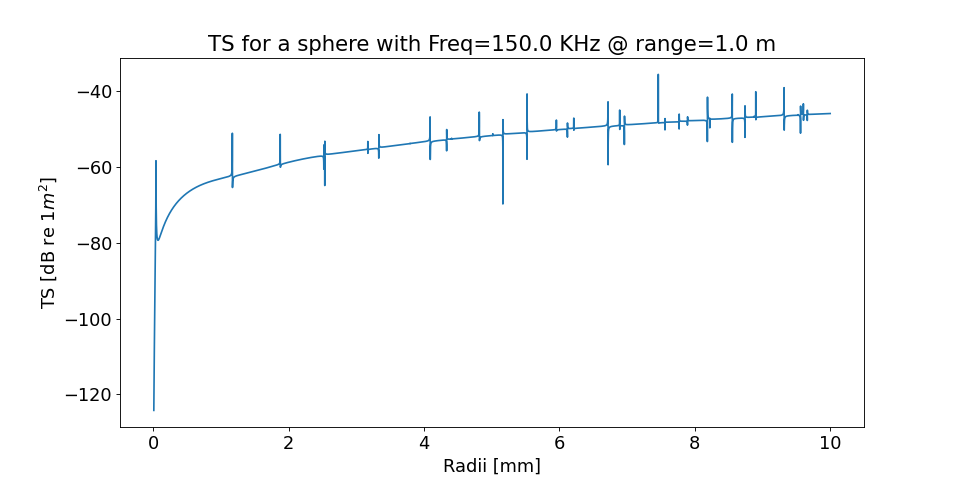

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(rad*1000, TS)
plt.xlabel("Radii [mm]")
plt.ylabel("TS [dB re 1$m^2$]")
plt.title("TS for a sphere with Freq=%.1f KHz @ range=%.1f m"%(f/1000,Range))
#ax.set_xscale('log')
plt.show()

In [ ]:
#Thuraisingham

In [ ]:
ethas=0.0014#shear viscosity
rhow=1026
cp=2191 #specifi9c heat capacity
gamma=1.299 
kcond=0.306 #thermal conductivity
#rhoG0=0.66
rhoG0 = 1.87
Pst0=101325
g=9.8
#rad=np.arange(0.002,0.004,0.000001)
#rad=np.arange(0.00001,0.01,0.000001)
#rad=np.linspace(BSD[0][0]/2/1000, BSD[0][-1]/2/1000, num=200)
#rad=0.003;
sigma=0.0740;#surface tesion
freq=f
#freq=freqs
# freq=150000;
Pst=Pst0+rhow*g*depth #static pressure (Pa)
r_fix=math.sqrt(3*gamma*Pst/rhow)/(2*math.pi*freq)
cw=1500
k=2*math.pi*freq/cw;
pv=872 # vapour pressure [Pa] at 10?C
omega=2*math.pi*freq
Mm=0.016 #molar mass CH4 [kg/mol]
R=8.31 #gas constant [m2 kg s?2 K?1 mol?1]
T=273+10 #temperature (kelvin)

In [ ]:
Pgas=Pst0+rhow*g*depth+2*sigma/rad-pv #gas pressure inside the bubble
rhoG=rhoG0*(1+2*sigma/(Pst*rad))*(1+0.1*depth)
Da=kcond/(rhoG*cp) #Thermal diffusivity gas m2/s
Xhi=np.sqrt(2*omega*rad/Da)
GammaPolyIn=gamma/(1-((1+1j)*Xhi/2/(np.tanh((1+1j)*Xhi/2))-1)*6j*(gamma-1)/(Xhi*Xhi))
OMG_complex2=3/(rhow*rad*rad)*(GammaPolyIn*Pgas-2*sigma/(3*rad))
w0=np.sqrt(OMG_complex2.real)
beta_th=OMG_complex2.imag/(2*omega)
beta_vis=2*ethas/(rhow*rad*rad)
beta0=beta_th+beta_vis
Thur_factor=(np.sin(k*rad)/(k*rad))*(np.sin(k*rad)/(k*rad))/(1+(k*rad)*(k*rad)) #Thuraisingham factor
BX=rad**2/((w0*w0/(omega*omega)-1-2*beta0*k*rad/omega)*\
(w0*w0/(omega*omega)-1-2*beta0*k*rad/omega)+\
(2*beta0/omega+w0*w0*k*rad/(omega*omega))*\
(2*beta0/omega+w0*w0*k*rad/(omega*omega)))*Thur_factor

TStheo=10*np.log10(BX)

C:\Users\mvelo\AppData\Local\Temp\ipykernel_25408\3591471439.py:5: RuntimeWarning: overflow encountered in tanh
  GammaPolyIn=gamma/(1-((1+1j)*Xhi/2/(np.tanh((1+1j)*Xhi/2))-1)*6j*(gamma-1)/(Xhi*Xhi))


In [ ]:
from scipy.optimize import curve_fit
def objective(x, a, b):
    return a * x + b

popt, _ = curve_fit(objective, rad[(rad>0.0001)*(rad<0.009)], TS[(rad>0.0001)*(rad<0.009)])
a, b = popt

In [ ]:
def objective2(x, a, b, c):
    #return a * x + b
    return a*x**2+b*x+c


#popt, _ = curve_fit(objective, rad[(rad>0.001)*(rad<0.009)], TStheo[(rad>0.001)*(rad<0.009)])
#a, b = popt


params, _ = curve_fit(objective2, rad[(rad>0.0001)*(rad<0.009)], TS[(rad>0.0001)*(rad<0.009)])
a2, b2, c2 = params[0], params[1], params[2]
#yfit1 = a*x**2+b*x+c


In [ ]:
min_rad=0.0001
max_rad=0.009
max_rad0=0.004

x = rad[(rad>min_rad)*(rad<max_rad)]
x0 = rad[(rad>min_rad)*(rad<max_rad0)]
y1 = TStheo[(rad>min_rad)*(rad<max_rad0)]
y2 = TS[(rad>min_rad)*(rad<max_rad)]
z1 = np.polyfit(x0, y1, 10)
z2 = np.polyfit(x, y2, 10)
p1 = np.poly1d(z1)
p2 = np.poly1d(z2)

In [ ]:
diff1=np.abs(np.gradient(TStheo[(rad>0.001)*(rad<0.004)]))
ind_min_slope1=np.argmin(diff1)+np.min(np.where((rad>0.001)*(rad<0.004))[0])
diff2=np.abs(np.gradient(TStheo[(rad>0.006)*(rad<0.009)]))
ind_min_slope2=np.argmin(diff2)+np.min(np.where((rad>0.006)*(rad<0.009))[0])
rad_o=[rad[ind_min_slope1],rad[ind_min_slope2]]
TStheo_o=[TStheo[ind_min_slope1],TStheo[ind_min_slope2]]

from scipy.optimize import curve_fit
def objective(x, a, b):
    return a * x + b

popt, _ = curve_fit(objective, rad_o, TStheo_o)
a, b = popt

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


<IPython.core.display.Javascript object>


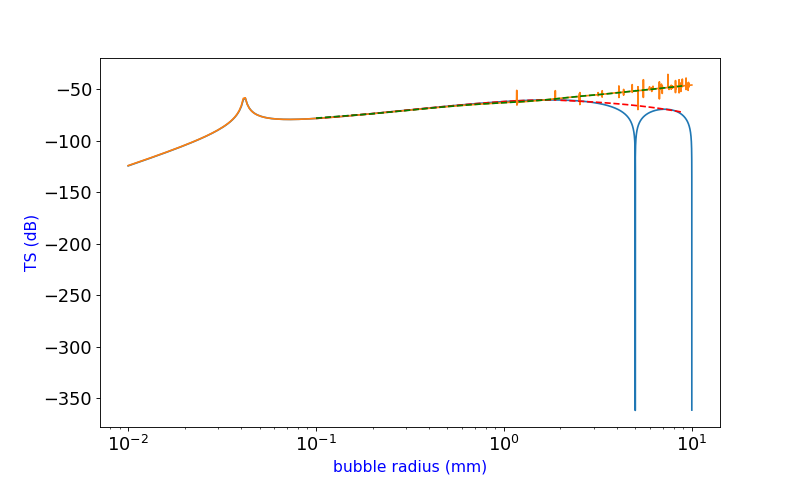

In [ ]:
#plot theoretical backscattering
plt.close('BX')
fig = plt.figure('BX',figsize=(10, 6))
ax = fig.subplots()
ax.clear()
ax.plot(rad*1000,TStheo)
ax.plot(rad*1000,TS)
ax.set_ylabel("TS (dB)",color="blue",fontsize=14)
ax.set_xlabel("bubble radius (mm)",color="blue",fontsize=14)

x_line = np.arange(min_rad, max_rad, 0.0001)
x_line0 = np.arange(min_rad, 0.002, 0.0001)
# calculate the output for the range
y_line2 = objective2(x_line, a2, b2, c2)
y_line = objective(np.arange(0.002, 0.009, 0.0001), a, b)
# create a line plot for the mapping function
ax.plot(np.arange(0.002, 0.009, 0.0001)*1000, y_line, '--', color='red')
#ax.plot(x_line*1000, y_line2, '--', color='green')
ax.plot(x_line0*1000, p1(x_line0), '--', color='red')
ax.plot(x_line*1000, p2(x_line), '--', color='green')
ax.set_xscale('log')
plt.show()